In [1]:
# get cm4 so and thetao data ('gn' without regriding)
from intake import open_catalog
url = "https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/master.yaml"
col = open_catalog(url).climate.cmip6_gcs()

dslist = col.search(variable_id = ['so', 'thetao'], table_id = 'Omon', experiment_id = 'piControl', grid_label = 'gn')
# ds = dslist['CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn'].to_dask()
# ds = ds.squeeze('member_id').reset_coords('member_id', drop = True)

In [6]:
list(dslist)

['CMIP.MPI-M.ICON-ESM-LR.piControl.Omon.gn',
 'CMIP.NASA-GISS.GISS-E2-1-G-CC.piControl.Omon.gn',
 'CMIP.CCCma.CanESM5-CanOE.piControl.Omon.gn',
 'CMIP.BCC.BCC-CSM2-MR.piControl.Omon.gn',
 'CMIP.NCC.NorESM2-MM.piControl.Omon.gn',
 'CMIP.NCAR.CESM2-WACCM-FV2.piControl.Omon.gn',
 'CMIP.IPSL.IPSL-CM6A-LR.piControl.Omon.gn',
 'CMIP.NCAR.CESM2-FV2.piControl.Omon.gn',
 'CMIP.MIROC.MIROC-ES2L.piControl.Omon.gn',
 'CMIP.CCCR-IITM.IITM-ESM.piControl.Omon.gn',
 'CMIP.NCAR.CESM2-WACCM.piControl.Omon.gn',
 'CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn',
 'CMIP.CNRM-CERFACS.CNRM-CM6-1-HR.piControl.Omon.gn',
 'CMIP.MPI-M.MPI-ESM1-2-LR.piControl.Omon.gn',
 'CMIP.THU.CIESM.piControl.Omon.gn',
 'CMIP.EC-Earth-Consortium.EC-Earth3.piControl.Omon.gn',
 'CMIP.NASA-GISS.GISS-E2-2-G.piControl.Omon.gn',
 'CMIP.FIO-QLNM.FIO-ESM-2-0.piControl.Omon.gn',
 'CMIP.MOHC.HadGEM3-GC31-LL.piControl.Omon.gn',
 'CMIP.CCCma.CanESM5.piControl.Omon.gn',
 'CMIP.SNU.SAM0-UNICON.piControl.Omon.gn',
 'CMIP.MIROC.MIROC6.piControl.Om

In [4]:
col.search(variable_id = ['siconc'], 
           # table_id = 'Omon', 
           experiment_id = 'piControl', 
           source_id = 'GFDL-CM4', 
           grid_label = 'gn').df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,piControl,r1i1p1f1,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/piCon...,NaN,20180701


In [26]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, y: 1080, x: 1440, vertex: 4, lev: 35, time: 6000)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lat_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lon_bnds   (y, x, vertex) float32 dask.array<chunksize=(1080, 1440, 4), meta=np.ndarray>
  * time       (time) object 0151-01-16 12:00:00 ... 0650-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(6000, 2), meta=np.ndarray>
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Dimensions without coordinates: vertex
Data variables:
    so         (time, lev, y, x) float32 dask.array<chunksize=(2, 35, 1080, 1440), meta=np.ndarray>
    thetao     (time, lev, y, x) float32 dask.array<chunksize=(1, 35, 1080, 1440), meta=np.ndarray>
Attributes: (12/47)
    mip_era:                 CMIP6
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    parent_experiment_id:    piControl-spinup
    experiment_id:           piControl
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    product:                 model-output
    ...                      ...
    source_id:               GFDL-CM4
    realm:                   ocean
    version_id:              v20180701
    grid_label:              gn
    parent_mip_era:          CMIP6
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.piControl.Omon.gn

In [14]:
from dask_gateway import Gateway
gateway = Gateway()
# cluster = GatewayCluster()
options = gateway.cluster_options()

options.worker_cores = 4 # 16 #16 / 4
options.worker_memory = 16 # 32 #32 / 8  

cluster = gateway.new_cluster(options)

cluster.adapt(minimum = 2, maximum = 150)

client = cluster.get_client() 
cluster

/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py:21: FutureWarning: format_bytes is deprecated and will be removed in a future release. Please use dask.utils.format_bytes instead.
  from distributed.utils import LoopRunner, format_bytes


In [16]:
client.close()
cluster.close()

In [2]:
import numpy as np
import xesmf as xe
import xarray as xr

import copy

In [3]:
# functions for calculating potential density (dens0)

def smow(t):
    a = (999.842594, 6.793952e-2, -9.095290e-3, 1.001685e-4, -1.120083e-6,
         6.536332e-9)
    T68 = t * 1.00024
    return (a[0] + (a[1] + (a[2] + (a[3] + (a[4] + a[5] * T68) * T68) * T68) *
            T68) * T68)

def dens0(s, t):
    T68 = t * 1.00024
    b = (8.24493e-1, -4.0899e-3, 7.6438e-5, -8.2467e-7, 5.3875e-9)
    c = (-5.72466e-3, 1.0227e-4, -1.6546e-6)
    d = 4.8314e-4
    return (smow(t) + (b[0] + (b[1] + (b[2] + (b[3] + b[4] * T68) * T68) *
            T68) * T68) * s + (c[0] + (c[1] + c[2] * T68) * T68) * s *
            s ** 0.5 + d * s ** 2)

In [4]:
def func_sep_dens0(dst, dss):
    da_t = list(dst.groupby("time.month"))[8][-1]
    da_s = list(dss.groupby("time.month"))[8][-1]
    da_dens = dens0(da_s, da_t)
    return da_dens

In [5]:
# functions for calculate MLD
def func_mld(dens_diff, depths):
    '''
    Function for calculate mld from density difference (den - den10 - 0.03) and depth
    Return mixed layer depth 
    '''
    if np.isnan(dens_diff[0]):
        mld = np.nan
    elif dens_diff[0] >= 0:
        mld = np.nan
    else:
        nthr_index = np.where(dens_diff > 0)[0]
        if len(nthr_index) == 0:
            naninds = np.where(np.isnan(dens_diff))[0]
            if len(naninds) > 0:
                nanindex = naninds[0]
            else:
                nanindex = len(depths)
            mld = depths[nanindex-1]
        else:
            nind = nthr_index[0] + 1
            mld = np.interp(0, dens_diff[nind-2:nind], depths[nind-2:nind])                
    return mld

def xr_func_mld(dens):
    '''
    Function for parallel computing
    '''
    dens10 = dens.interp(lev = 10, method = 'linear')  # density at 10m
    dens_diff = dens - dens10 - 0.03               # density differences 
    mld = xr.apply_ufunc(
        func_mld, 
        dens_diff,#.chunk({"time":25, "x":30, "y":30}),  
        dens_diff.lev, 
        input_core_dims = [["lev"], ["lev"]], 
        vectorize = True,
        dask = "parallelized",
        output_dtypes = [dens_diff.lev.dtype],
    )
    return mld

In [6]:
def func_conv_old(dst, dss, d):
    mld = xr_func_mld(func_sep_dens0(dst, dss)) # calculate september potential density and mld
    conv = xr.where(mld >= 2000, mld, np.nan) # select the area where mld > 2000

    conv_area = conv.mean(dim = 'time', skipna = True)
    conv_t = dst.where(conv_area >= 0)
    convt = conv_t.groupby('time.year').mean(dim='time', skipna=True).mean(dim='x', skipna=True).mean(dim='y', skipna=True)
    
    ind_t = convt.sel(lev = d, method = 'nearest')
    conv_ind = (ind_t - ind_t.mean('year'))/ind_t.std('year') * -1
    
    return conv_area, conv_ind

In [7]:
def func_conv(dst, dss):
    mld = xr_func_mld(func_sep_dens0(dst, dss)) # calculate september potential density and mld
    conv = xr.where(mld >= 2000, mld, np.nan) # select the area where mld > 2000
    conv_year = conv.mean(dim = 'x', skipna = True).mean(dim = 'y', skipna = True)
    convyear_mld = xr.where(conv_year >= 0, mld, np.nan)
    conv_mld = convyear_mld.mean(dim = 'time', skipna = True)
    conv_area = xr.where(conv_mld >= 2000, conv_mld, np.nan)
    return conv_year, conv_mld, conv_area

In [8]:
def func_conv2(dst, dss):
    mld = xr_func_mld(func_sep_dens0(dst, dss)) # calculate september potential density and mld
    mldstd = mld.std(dim = 'time')
    mld_mean = mld.mean(dim = 'time')
    newstd = mldstd/mld_mean
    return mldstd, newstd

In [9]:
def func_convt_all(dst, dss, d):
    mldstd = func_conv2(dst, dss)
    dst_ann = dst.groupby('time.year').mean('time')
    convareat = xr.where(mldstd >= d, dst_ann, np.nan)
    convt = convareat.mean(dim = 'x', skipna = True).mean(dim = 'y', skipna = True)
    return convt    

In [ ]:
# calculate the z-score (spatial) 
def func_conv_stdz(dst, dss):
    mld = xr_func_mld(func_sep_dens0(dst, dss)) 
    mldstd = mld.std(dim = 'time')
    

In [7]:
ds_weddell = ds.sel(x = slice(-60, 30), y = slice(-90, -60))  
ds_ross = ds.sel(x = slice(-210, -135), y = slice(-90, -60)) 

In [6]:
ds_so = ds.sel(y = slice(-90, -40)) 

In [7]:
mldsep_so = xr_func_mld(func_sep_dens0(ds_so.thetao, ds_so.so))

In [8]:
mldsep_std_so = mldsep_so.std(dim = 'time')

In [13]:
mldsep_zs_so = (mldsep_std_so - mldsep_std_so.mean())/mldsep_std_so.std()

In [12]:
ds_so_ann = ds_so.groupby('time.year').mean(dim = 'time', skipna = True)

In [20]:
mld_so = xr_func_mld(dens0(ds_so.so, ds_so.thetao))
annmld_so = mld_so.groupby('time.year').mean(dim = 'time', skipna = True)
annmldstd_so = annmld_so.std(dim = 'year')

In [32]:
annmldmean_so = annmld_so.chunk({"x":80, "y":60}).mean(dim = 'year')
annmldmean_so

<xarray.DataArray (y: 329, x: 1440)>
dask.array<mean_agg-aggregate, shape=(329, 1440), dtype=float64, chunksize=(60, 80), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 dask.array<chunksize=(60, 80), meta=np.ndarray>
    lon      (y, x) float32 dask.array<chunksize=(60, 80), meta=np.ndarray>
  * x        (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.28 59.53 59.78 60.03
  * y        (y) float64 -80.39 -80.31 -80.23 -80.15 ... -40.41 -40.22 -40.03

In [13]:
mld_so_ann = xr_func_mld(dens0(ds_so_ann.so, ds_so_ann.thetao))
stdmld_so_ann = mld_so_ann.std(dim = 'year')
newstd_so_ann = mld_so_ann.std(dim = 'year')/mld_so_ann.mean(dim = 'year')

In [33]:
mldstd_so, newstd_so = func_conv2(ds_so.thetao, ds_so.so)

In [15]:
mldsep_zs_so.load()

<xarray.DataArray (y: 329, x: 1440)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.355819  , 0.39448224, 0.41968556, ..., 0.38151068, 0.34936952,
        0.34020389],
       [0.34867504, 0.39266805, 0.42369958, ..., 0.37356364, 0.34229576,
        0.33822178],
       [0.34867965, 0.39049343, 0.40665366, ..., 0.35184799, 0.32447492,
        0.33457562]])
Coordinates:
    lat      (y, x) float32 -79.81 -79.81 -79.8 -79.8 ... -40.03 -40.03 -40.03
    lon      (y, x) float32 -299.7 -299.5 -299.2 -299.0 ... 59.38 59.62 59.88
  * x        (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.28 59.53 59.78 60.03
  * y        (y) float64 -80.39 -80.31 -80.23 -80.15 ... -40.41 -40.22 -40.03

In [64]:
mldstd_weddell = func_conv2(ds_weddell.thetao, ds_weddell.so)

In [73]:
mldstd_ross = func_conv2(ds_ross.thetao, ds_ross.so)

In [45]:
conv_t_200m_weddell = func_convt_all(ds_weddell.thetao, ds_weddell.so, 200)

conv_t_200m_ross = func_convt_all(ds_ross.thetao, ds_ross.so, 200)

In [95]:
conv_t_500m_ross = func_convt_all(ds_ross.thetao, ds_ross.so, 500)

In [12]:
conv_area_weddell_old, convt_500_weddell_old = func_conv_old(ds_weddell.thetao, ds_weddell.so, 500)

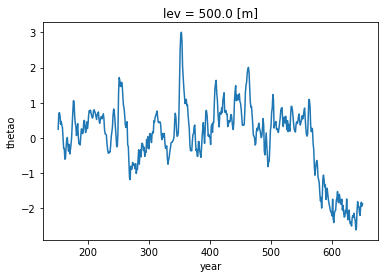

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.9/ssl.py", line 1309, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLEOFError: EOF occurred in violation of protocol (_ssl.c:1129)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/iostream.py", line 

In [22]:
convt_500_weddell_old.plot()

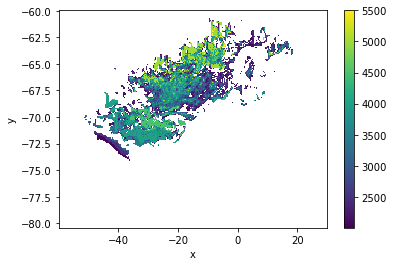

In [14]:
conv_area_weddell_old.plot()

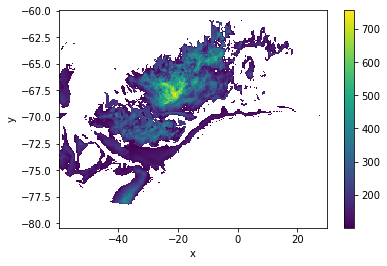

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
distributed.client - ERROR - Exception raised while shutting down cluster prod.c56f0aafe0f44df490d8ffbe9555d18d
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py", line 992, in _stop_internal
    await self.gateway._stop_cluster(self.name)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py", line 653, in _stop_cluster
    await self._request("DELETE", url)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/dask_gateway/client.py", line 396, in _request
    resp = await session.request(method, url, json=json, **self._request_kwargs)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/aiohttp/client.py", line 535, in _request
    conn = await self._connector.connect(
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/aiohttp/connector.py", line 542, in connect
  

In [99]:
mldstd_weddell.where(mldstd_weddell>100).plot()

In [17]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

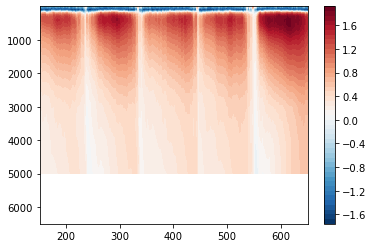

In [97]:
pltdata = conv_t_500m_ross
im = plt.contourf(pltdata.year, pltdata.lev, pltdata.transpose(), levels = 50,cmap=plt.cm.RdBu_r) #, norm=divnorm, 
plt.gca().invert_yaxis()
cbar = plt.colorbar(im)#, extend='none')

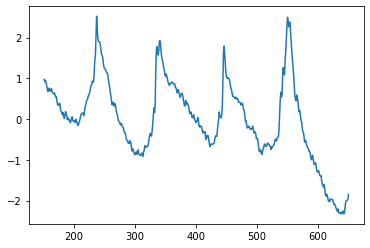

In [98]:
ind_t = conv_t_500m_ross.sel(lev = 2000, method = 'nearest')
conv_ind = (ind_t - ind_t.mean('year'))/ind_t.std('year') * -1
plt.plot(conv_ind.year, conv_ind)

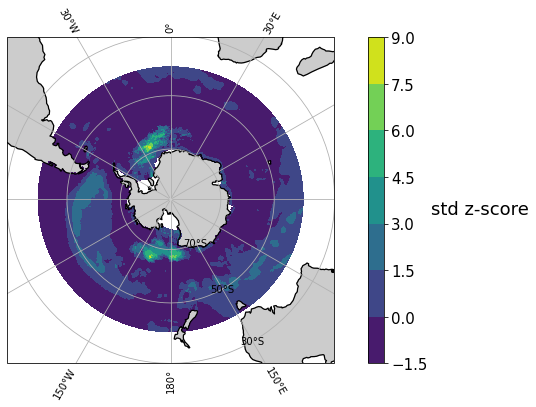

In [23]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, zorder=1, color='0.8')
ax.add_feature(cfeature.COASTLINE, linewidth=1.25)

gl = ax.gridlines(
    xlocs = np.arange(-180,180,30), 
    ylocs = np.arange(-90,90,20),
    draw_labels=True, y_inline=True)

# plt_mld, plt_lon = add_cyclic_point(conv_area_ross, coord=conv_area_ross.lon)
# my_level = np.arange(-2,2,5)
ptest = mldsep_zs_so#.where(mldsep_zs_so>2)
im = ax.contourf(ptest.lon, ptest.lat, ptest, transform=ccrs.PlateCarree())#, levels = 2)#, cmap=plt.cm.jet)
cbar = plt.colorbar(im)
cbar.set_label('std z-score', fontsize=18, rotation=0, horizontalalignment = 'left')
cbar.ax.tick_params(labelsize=15) 
# plt.title('Average September MLD - year '+ str(start_year) + '-' + str(end_year) + ', ' + model_name, fontsize=18)